In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
beta  = 0.1
n_qubits = 3

trotter_steps = 10
T = 1.0

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits, name='cr')
qc = QuantumCircuit(qr, cr)

for i in range(n_qubits):
    qc.h(i)

for step in range(trotter_steps):
    qc.rzz(-2 * gamma * 3.0, 0, 1)  # from: [('Z', 'a'), ('Z', 'b')]
    qc.rzz(-2 * gamma * 2.0, 0, 2)  # from: [('Z', 'a'), ('Z', 'c')]
    qc.rzz(-2 * gamma * 6.0, 1, 2)  # from: [('Z', 'b'), ('Z', 'c')]

    for i in range(n_qubits):
        qc.rx(2 * beta, i)

qc.measure(range(n_qubits), range(n_qubits))

simulator = BasicSimulator()

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print(result.get_counts())


{'010': 184, '100': 92, '011': 92, '001': 132, '101': 149, '110': 138, '000': 123, '111': 114}


{'011': 91, '101': 168, '001': 148, '100': 85, '010': 167, '111': 110, '110': 142, '000': 113}


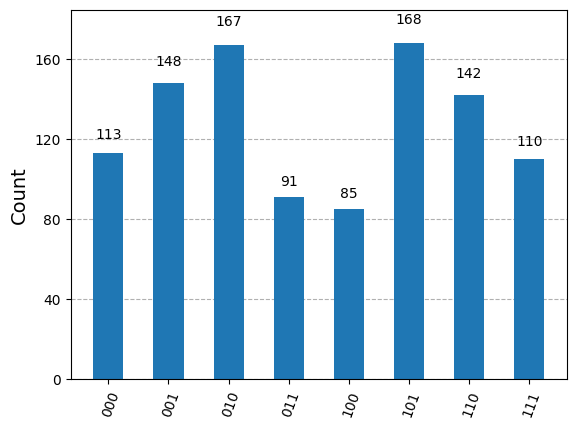

In [5]:
simulator = BasicSimulator()

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print(result.get_counts())

plot_histogram(result.get_counts())

{'001': 133, '101': 174, '110': 132, '000': 116, '100': 104, '011': 102, '010': 139, '111': 124}


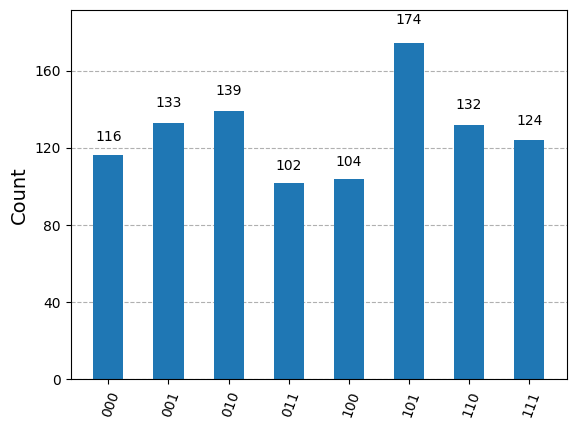

In [6]:
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime.fake_provider import FakeKyiv
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService

backend = FakeKyiv()

# Define Sampler
sampler = Sampler(mode=backend)

compiled_circuit = transpile(qc, backend)

# Run calculation
job = sampler.run([compiled_circuit], shots=1024)
 
result = job.result()

counts = result[0].data.cr.get_counts()

print(counts)

# Plot the histogram
plot_histogram(counts)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
 
api_token = '...'
service = QiskitRuntimeService(channel="ibm_quantum", token=api_token)
 
backend = service.least_busy(operational=True, simulator=False)
 
sampler = Sampler(mode=backend)

compiled_circuit = transpile(qc, backend)

job = sampler.run([compiled_circuit], shots=1024)
 
result = job.result()

counts = result[0].data.cr.get_counts()

print(counts)

plot_histogram(counts)